<a href="https://colab.research.google.com/github/Jiravatmos/Readme/blob/main/Model_for_predicting_employee_turnover_project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [ ]:
import pandas as pd
import re

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Download data Model for predicting employee turnover

In [ ]:
url = 'https://raw.githubusercontent.com/Pandadev37/Machine-Learning-Project/refs/heads/main/Dataset166%20(1).csv'
df = pd.read_csv(url)
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1,1279,...,3,80,0,2,2,1,2,2,2,2
1,No,29,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8
2,No,55,Non-Travel,177,Research & Development,8,1,Medical,1,1278,...,4,80,1,34,3,3,33,9,15,0
3,No,46,Travel_Rarely,168,Sales,4,2,Marketing,1,1280,...,3,80,1,26,2,3,11,4,0,8
4,No,34,Travel_Rarely,131,Sales,2,3,Marketing,1,1281,...,4,80,0,4,3,3,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,34,Travel_Rarely,1239,Sales,13,4,Medical,1,1951,...,3,80,1,9,2,2,8,7,1,1
1466,No,26,Travel_Rarely,157,Research & Development,1,3,Medical,1,1952,...,4,80,0,8,6,2,7,7,7,6
1467,No,29,Travel_Rarely,136,Research & Development,1,3,Life Sciences,1,1954,...,1,80,1,6,5,2,5,3,0,2
1468,No,32,Non-Travel,1146,Research & Development,15,4,Medical,1,1955,...,2,80,1,9,6,3,5,1,1,2


# Data preprocessing


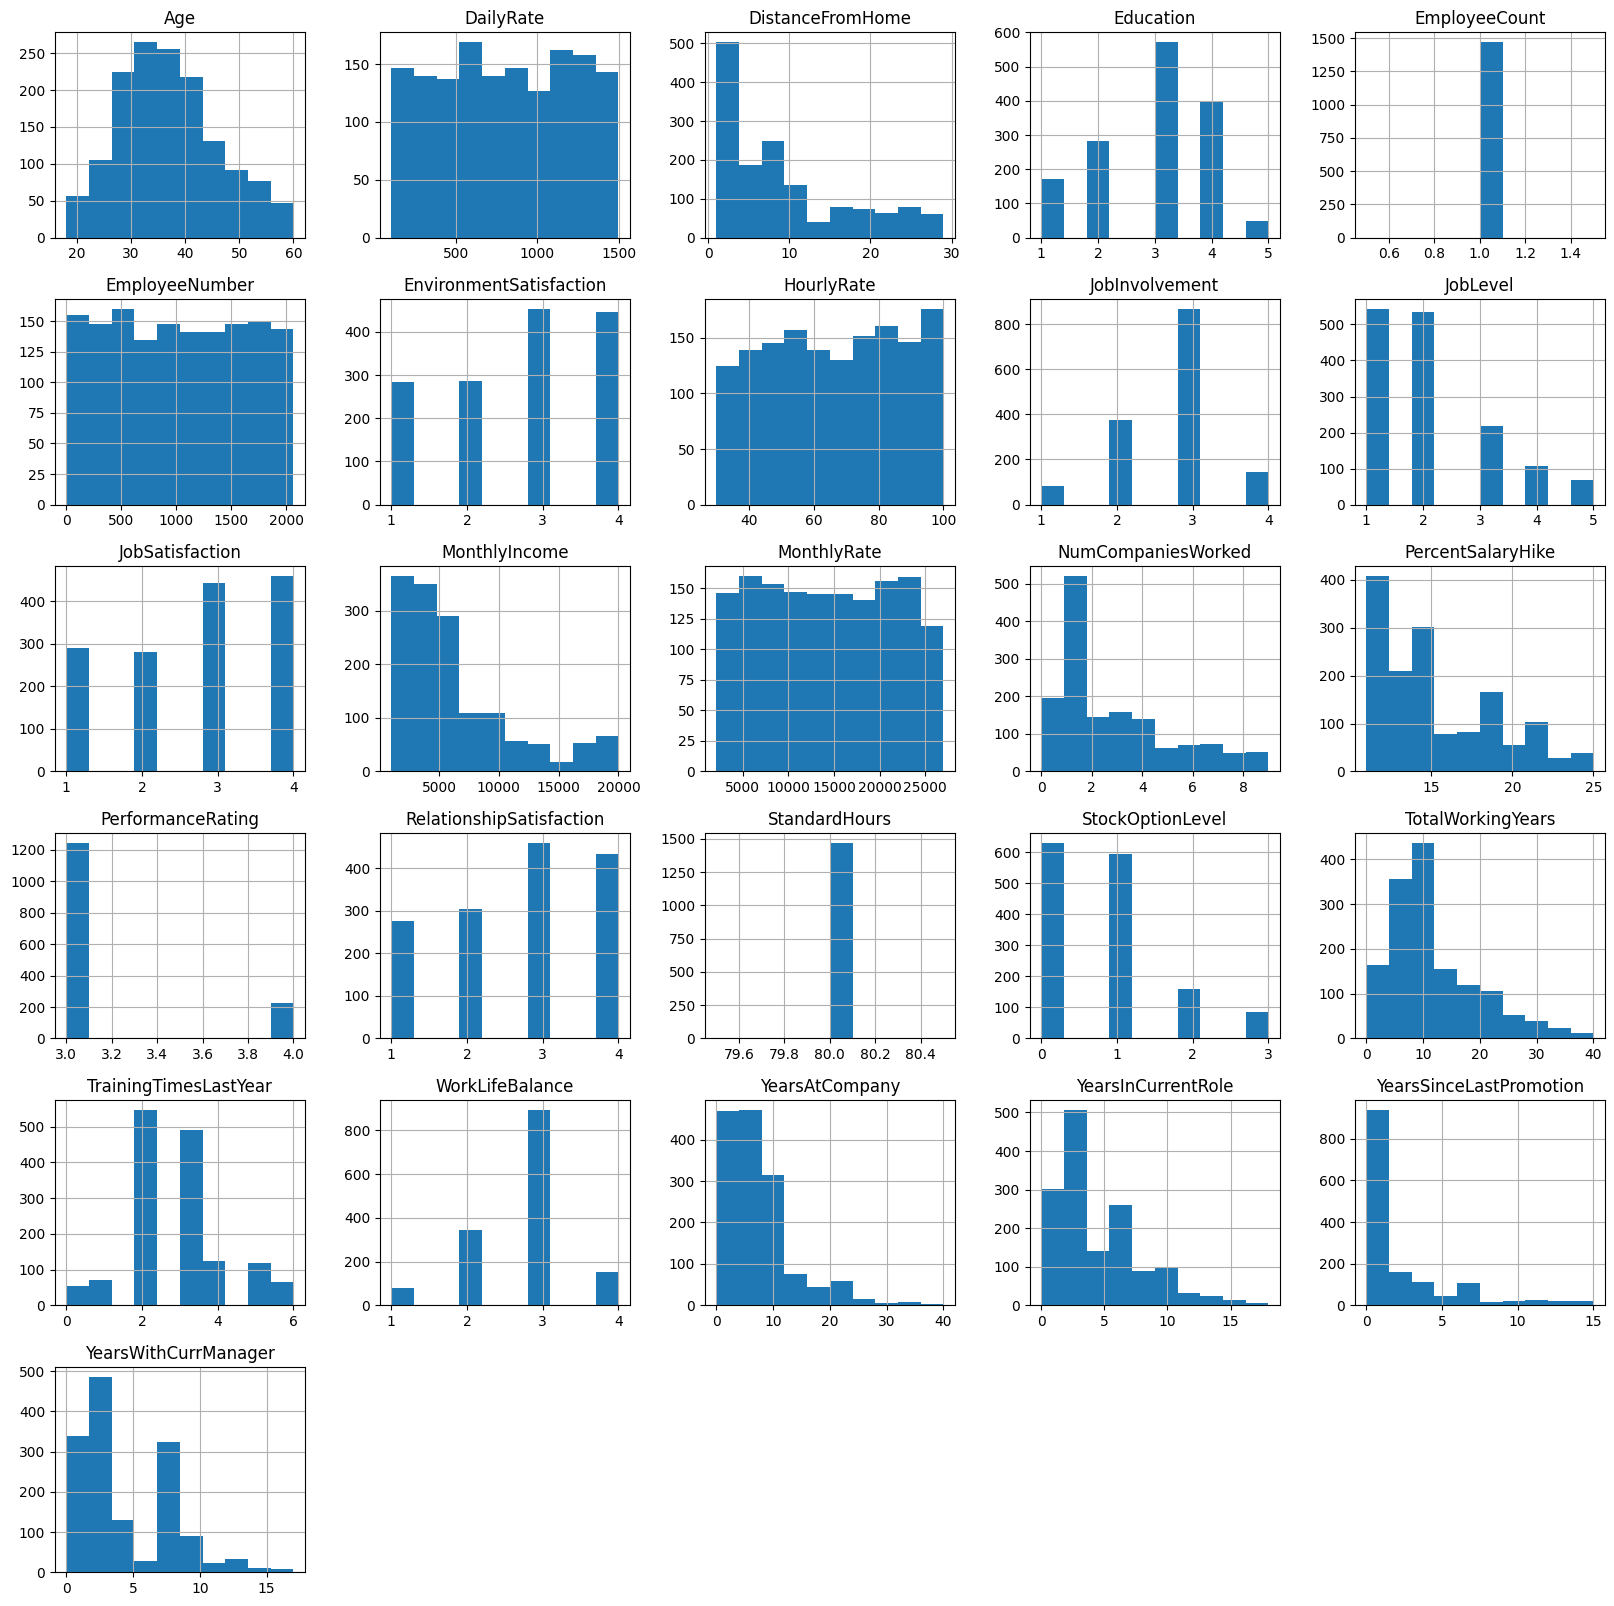

In [ ]:
df.hist(figsize=(20,20))
plt.show()

In [ ]:
# Cheak Missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Drop Feature have only one class
drop_columns = ['StandardHours' ,'Over18','EmployeeCount']
df.drop(columns=drop_columns, inplace=True)
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1279,1,...,4,3,0,2,2,1,2,2,2,2
1,No,29,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,20,2,...,3,3,1,10,1,3,10,9,8,8
2,No,55,Non-Travel,177,Research & Development,8,1,Medical,1278,4,...,3,4,1,34,3,3,33,9,15,0
3,No,46,Travel_Rarely,168,Sales,4,2,Marketing,1280,4,...,3,3,1,26,2,3,11,4,0,8
4,No,34,Travel_Rarely,131,Sales,2,3,Marketing,1281,3,...,3,4,0,4,3,3,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,34,Travel_Rarely,1239,Sales,13,4,Medical,1951,4,...,3,3,1,9,2,2,8,7,1,1
1466,No,26,Travel_Rarely,157,Research & Development,1,3,Medical,1952,3,...,3,4,0,8,6,2,7,7,7,6
1467,No,29,Travel_Rarely,136,Research & Development,1,3,Life Sciences,1954,1,...,3,1,1,6,5,2,5,3,0,2
1468,No,32,Non-Travel,1146,Research & Development,15,4,Medical,1955,3,...,3,2,1,9,6,3,5,1,1,2


ตรวจสอบหาค่า Outliner

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
category_columns = df.select_dtypes(include=['object'])
for column in category_columns.columns:
  df[column] = labelencoder.fit_transform(df[column])


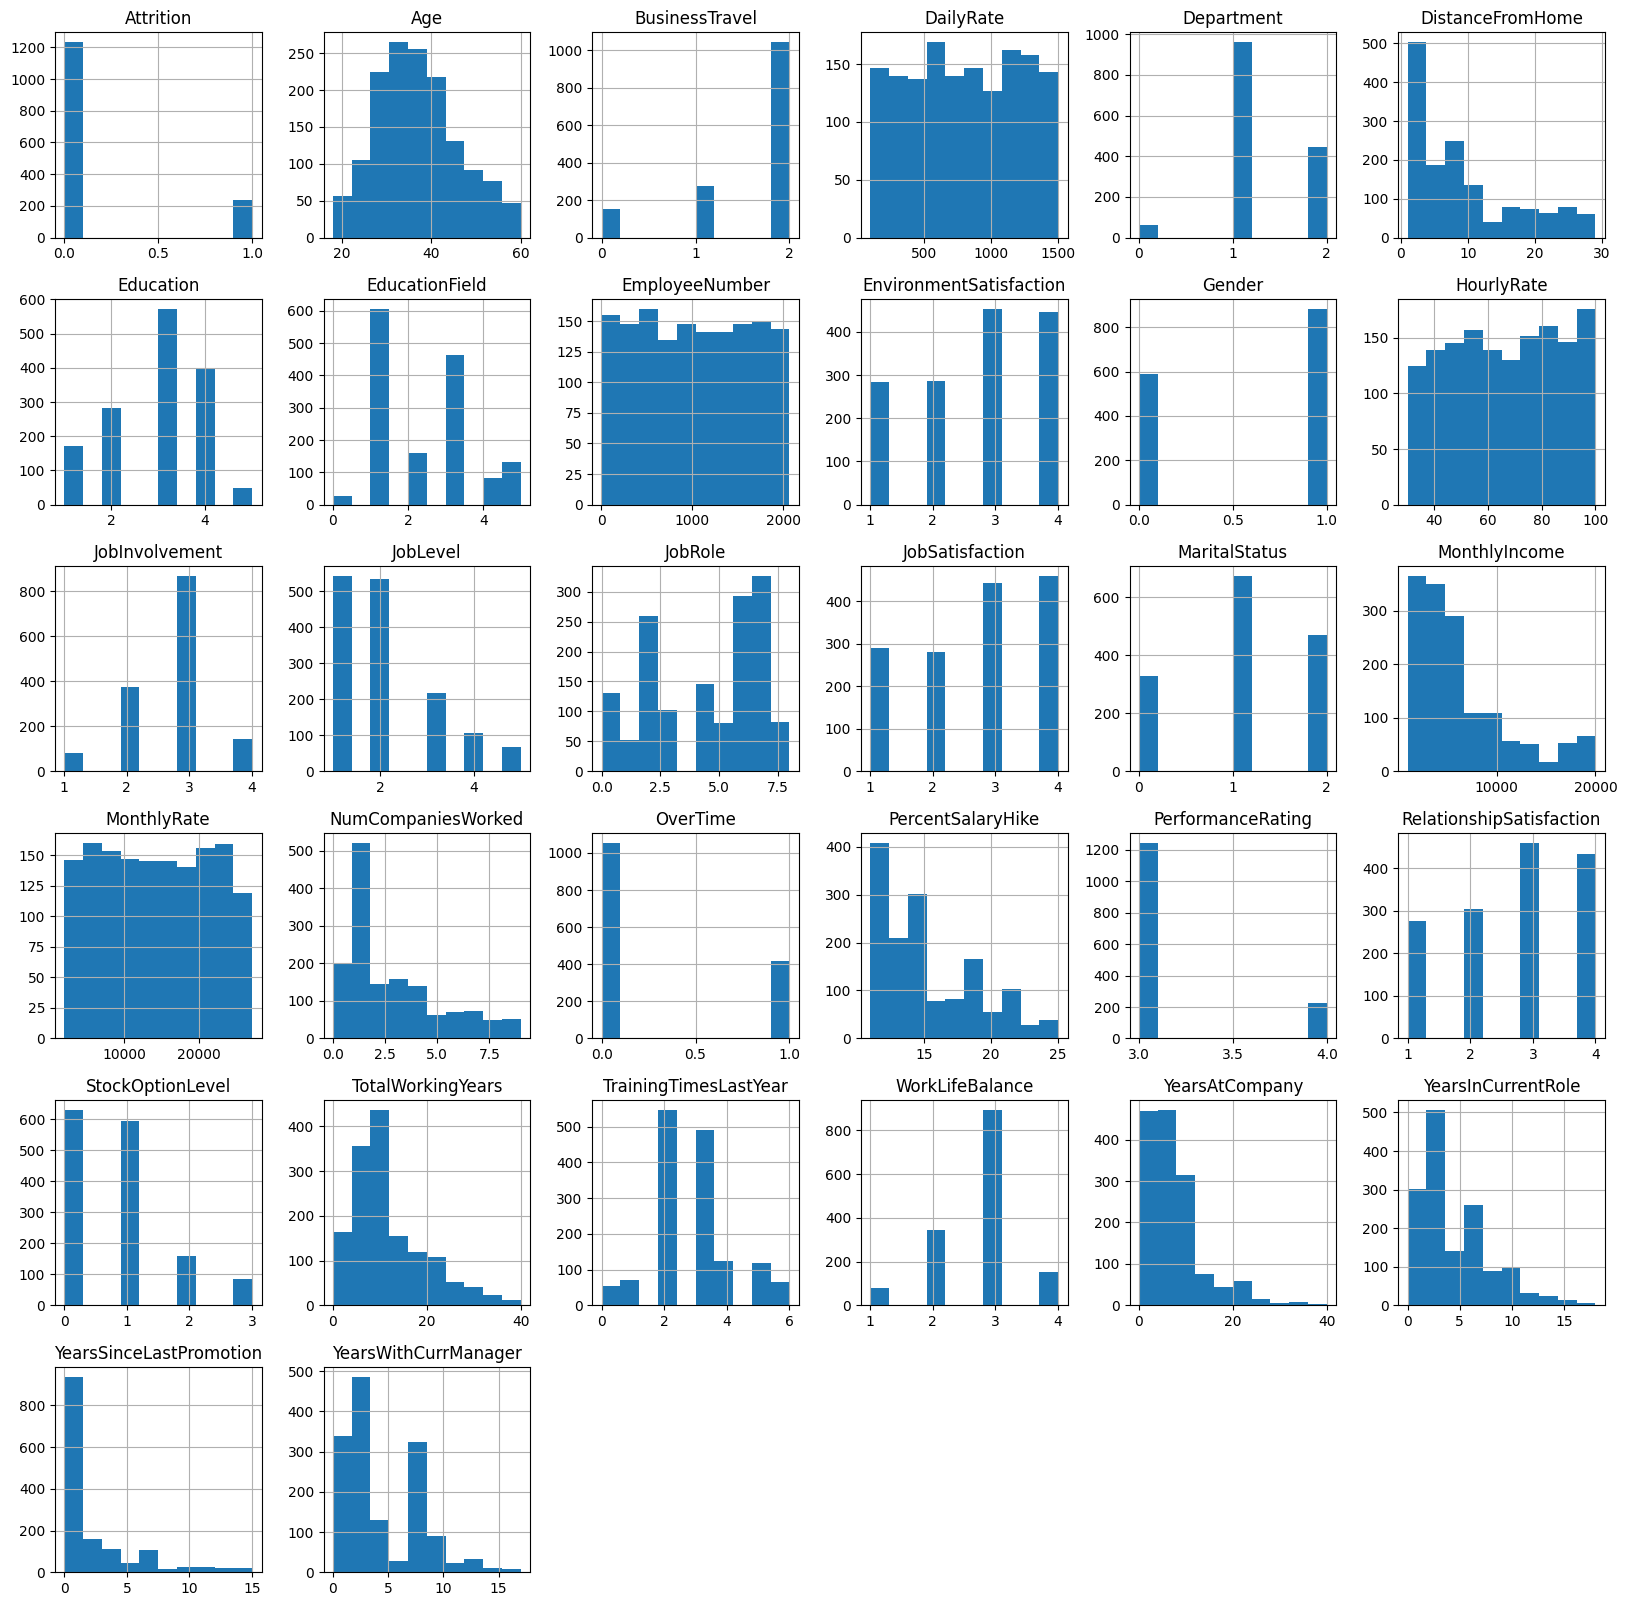

In [ ]:
df.hist(figsize=(20,20))
plt.show()
 #พบว่าข้อมูล Imbalanced Data

#Training Model Use CATBOOST


In [ ]:
pip install catboost

In [ ]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']


In [ ]:
print(np.sum(y==0))
print(np.sum(y==1))

1233
237


In [145]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=10,
    l2_leaf_reg=5,
    random_strength=2,
    bagging_temperature=0.5,
    loss_function='Logloss',
    eval_metric='AUC',

    class_weights=[1,8],
    verbose=10

)
model.fit(X_train, y_train, eval_set=(X_test, y_test),early_stopping_rounds=15)
y_pred = model.predict(X_test)

0:	test: 0.6491203	best: 0.6491203 (0)	total: 37ms	remaining: 7.37s
10:	test: 0.7147300	best: 0.7188625 (1)	total: 325ms	remaining: 5.59s
20:	test: 0.7295827	best: 0.7304419 (19)	total: 523ms	remaining: 4.45s
30:	test: 0.7373977	best: 0.7373977 (30)	total: 815ms	remaining: 4.44s
40:	test: 0.7556056	best: 0.7556056 (40)	total: 1.15s	remaining: 4.47s
50:	test: 0.7605565	best: 0.7605565 (50)	total: 1.42s	remaining: 4.16s
60:	test: 0.7666121	best: 0.7677987 (59)	total: 1.58s	remaining: 3.6s
70:	test: 0.7653437	best: 0.7677987 (59)	total: 1.74s	remaining: 3.17s
80:	test: 0.7689034	best: 0.7716448 (77)	total: 1.91s	remaining: 2.8s
90:	test: 0.7683715	best: 0.7716448 (77)	total: 2.08s	remaining: 2.49s
Stopped by overfitting detector  (15 iterations wait)

bestTest = 0.7716448445
bestIteration = 77

Shrink model to first 78 iterations.


In [146]:
# Evaluation predict Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       376
           1       0.52      0.46      0.49        65

    accuracy                           0.86       441
   macro avg       0.71      0.69      0.70       441
weighted avg       0.85      0.86      0.85       441



### report score

### confusion matrix

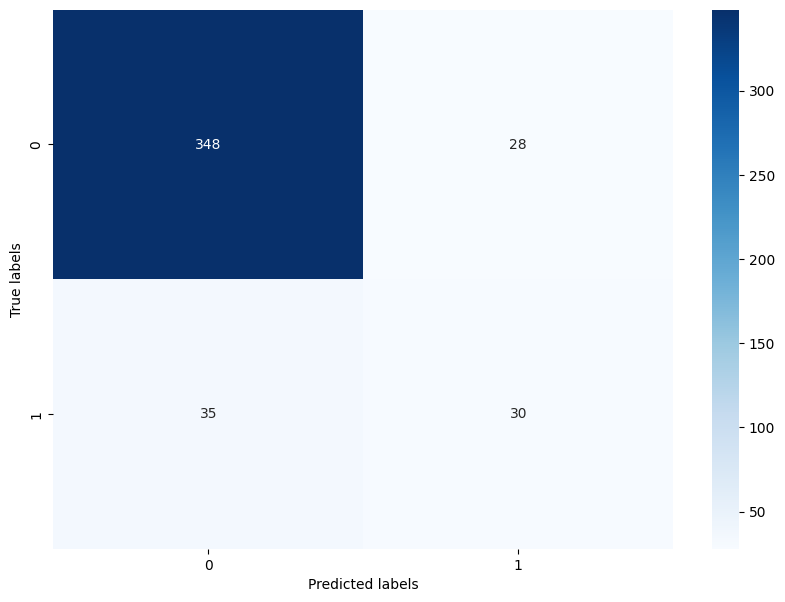

In [147]:
catB = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(catB, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Learning rate set to 0.010429
0:	learn: 0.6865060	total: 1.57ms	remaining: 1.57s
1:	learn: 0.6789803	total: 4.84ms	remaining: 2.42s
2:	learn: 0.6717068	total: 8.05ms	remaining: 2.67s
3:	learn: 0.6648312	total: 10.9ms	remaining: 2.71s
4:	learn: 0.6566200	total: 14.1ms	remaining: 2.81s
5:	learn: 0.6497762	total: 17.6ms	remaining: 2.92s
6:	learn: 0.6420982	total: 20ms	remaining: 2.84s
7:	learn: 0.6354509	total: 22.8ms	remaining: 2.83s
8:	learn: 0.6296512	total: 25ms	remaining: 2.75s
9:	learn: 0.6229889	total: 27ms	remaining: 2.68s
10:	learn: 0.6166523	total: 29.4ms	remaining: 2.64s
11:	learn: 0.6112548	total: 32ms	remaining: 2.63s
12:	learn: 0.6061236	total: 34.3ms	remaining: 2.6s
13:	learn: 0.6006194	total: 36.6ms	remaining: 2.58s
14:	learn: 0.5949929	total: 38.9ms	remaining: 2.56s
15:	learn: 0.5892791	total: 41.4ms	remaining: 2.54s
16:	learn: 0.5829221	total: 43.7ms	remaining: 2.53s
17:	learn: 0.5783949	total: 46ms	remaining: 2.51s
18:	learn: 0.5722244	total: 48.6ms	remaining: 2.51s
19:

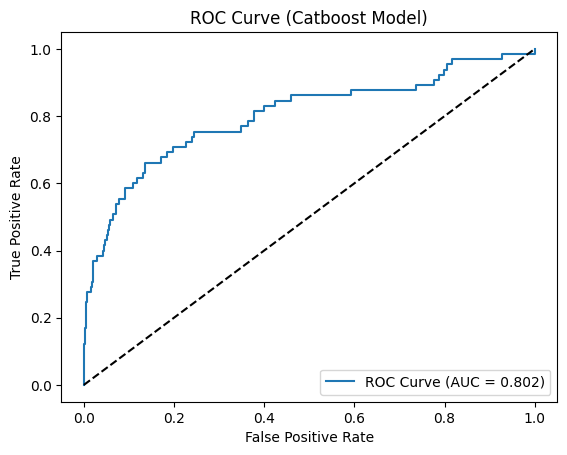

In [148]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


cat_classifier = CatBoostClassifier()
cat_classifier.fit(X_train, y_train)

# ทำนายความน่าจะเป็นของ Class 1 (positive class) สำหรับข้อมูลทดสอบ
y_test_pred = cat_classifier.predict_proba(X_test)[:, 1]


auc_score = roc_auc_score(y_test, y_test_pred)
print(f'AUC Score: {auc_score:.3f}')


fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_pred)

# สร้าง ROC curve
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.3f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')  # เส้นทำนายสุ่ม (diagonal line)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Catboost Model)')
plt.show()


#LIGHTGBM


In [149]:
pip install lightgbm

In [155]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


params = {
    'objective': 'binary',  # ปัญหา Binary Classification
    'metric': 'auc',        # ใช้ AUC สำหรับประเมิน
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 25,        # จำนวน Leaves ในแต่ละต้นไม้
    'learning_rate': 0.05,   # อัตราการเรียนรู้
    'feature_fraction': 0.8  ,# การใช้ฟีเจอร์บางส่วนในการสร้างต้นไม้
    "early_stopping_rounds": 10

}


model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)


y_pred = model.predict(X_test, num_iteration=model.best_iteration)

auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc:.4f}")


[LightGBM] [Info] Number of positive: 192, number of negative: 984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1391
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163265 -> initscore=-1.634131
[LightGBM] [Info] Start training from score -1.634131
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.811156
AUC: 0.8112


[LightGBM] [Info] Number of positive: 192, number of negative: 984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1391
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163265 -> initscore=-1.634131
[LightGBM] [Info] Start training from score -1.634131
AUC Score: 0.816


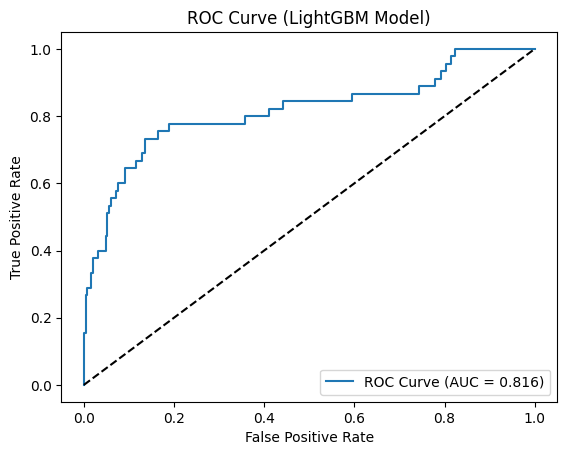

In [158]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


LGBM_classifier = lgb.LGBMClassifier()
LGBM_classifier.fit(X_train, y_train)

# ทำนายความน่าจะเป็นของ Class 1 (positive class) สำหรับข้อมูลทดสอบ
y_test_pred = cat_classifier.predict_proba(X_test)[:, 1]


auc_score = roc_auc_score(y_test, y_test_pred)
print(f'AUC Score: {auc_score:.3f}')


fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_pred)

# สร้าง ROC curve
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.3f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')  # เส้นทำนายสุ่ม (diagonal line)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LightGBM Model)')
plt.show()